In [2]:
# import the libraries
import pandas as pd
import numpy as np

# data vizualisation
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# outliers
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

# for models creation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# for accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting the data
from sklearn.model_selection import train_test_split

# used for outliers
from scipy import stats

In [3]:
# import the date frame
df = pd.read_csv('housing_data.csv')

### data description

1.	CRIM variază de la valori foarte mici, cum ar fi 0,00632, până la valori mai mari precum 0,21124, indicând rata per capita a criminalității pe oraș. 
2.	ZN indică proporția terenului rezidențial zonificat pentru loturi mari, unde vedem valori precum 18.0 și 12.5, dar și multe intrări cu 0.0. 
3.	INDUS prezintă proporții variate ale afacerilor non-retail pe oraș, cu valori ca 2.31 sau 7.87. 
4.	CHAS este o variabilă dummy pentru râul Charles, unde o valoare de 1 indică apropiere de râu, dar majoritatea intrărilor sunt 0, cu excepția unor valori lipsă (NaN). 
5.	NOX prezintă concentrații ale oxidului de azot, cu variații între 0,458 și 0,538. 
6.	RM oferă o idee despre numărul mediu de camere pe locuință, cu valori cuprinse între 5,631 și 7,185. 
7.	AGE arată proporția locuințelor ocupate de proprietar construite înainte de 1940, variind de la 45,8 la 100. 
8.	DIS prezintă distanțe ponderate până la cinci centre de angajare din Boston, cu valori cuprinse între 4,0900 și 6,5921. 
9.	RAD și TAX variază în funcție de accesibilitatea la autostrăzi și rata impozitului pe proprietate. 
10.	PTRATIO prezintă variații ale raportului elev-profesor în diferite orașe. 
11. B este o transformare a proporției de populație de culoare, cu valori apropiate de 400 în multe intrări. 
12.	LSTAT și MEDV arată procentul populației cu un statut inferior și, respectiv, valoarea medie a locuințelor. Este important de remarcat că există valori lipsă (NaN) în setul de date, în special în coloanele CHAS și LSTAT. 


### analizei exploratorie a datelor 

In [4]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### data analysis

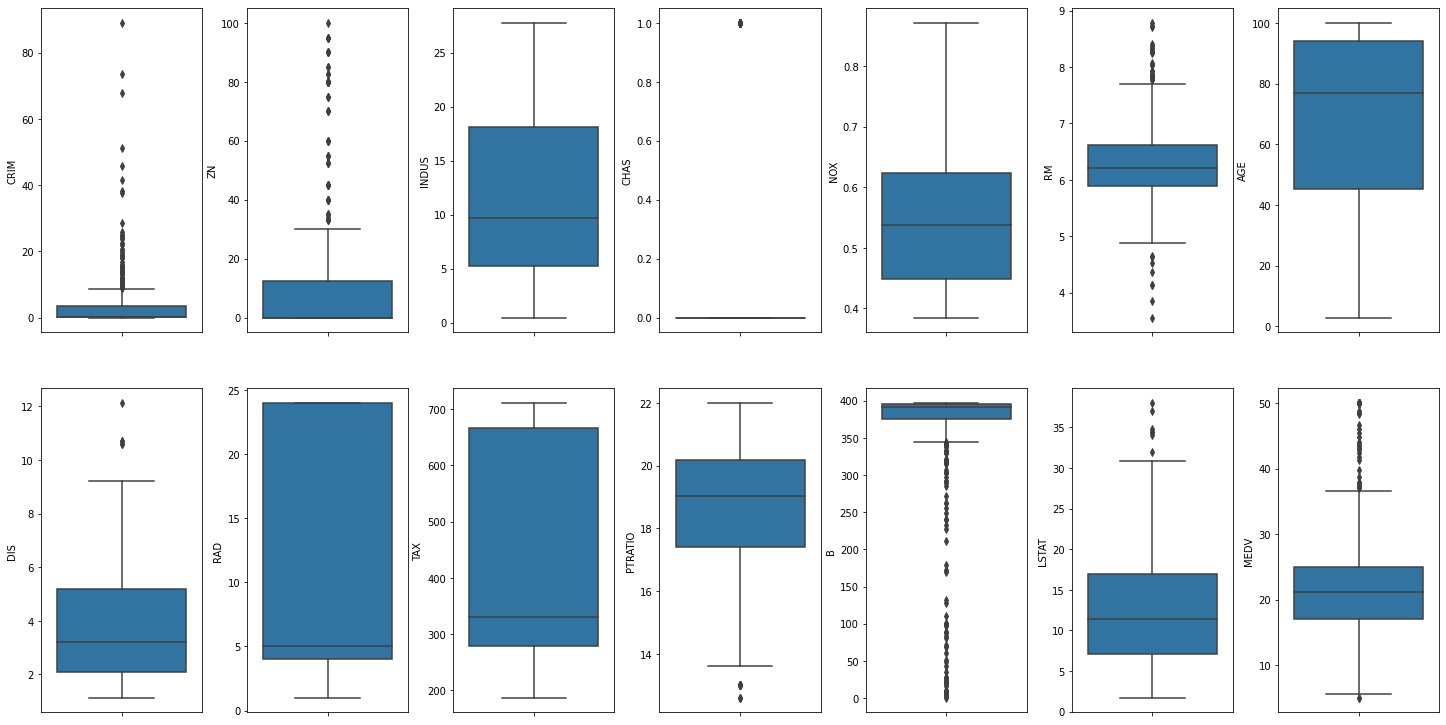

In [7]:
# visualizarea datelor
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y = k, data = df, ax = axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

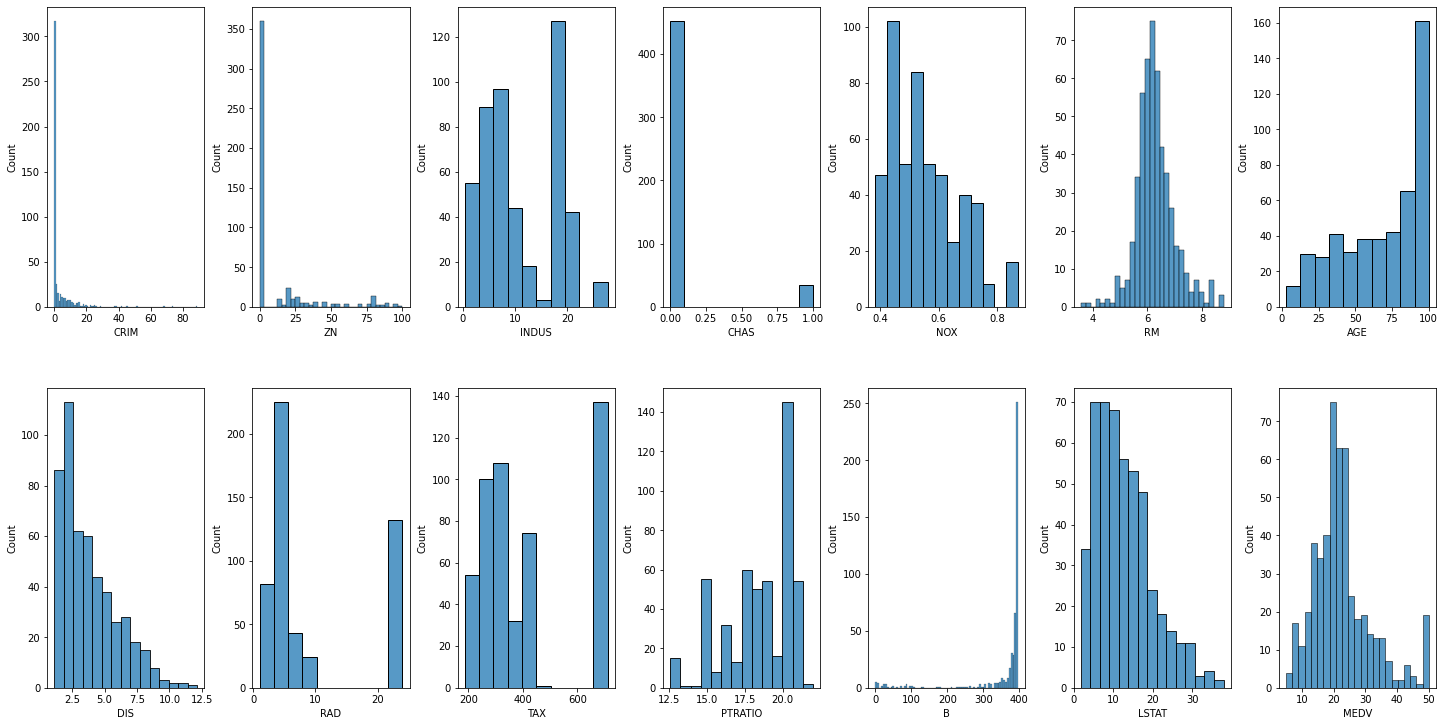

In [8]:
# the features plus MEDV distributions looks like
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

### missing values

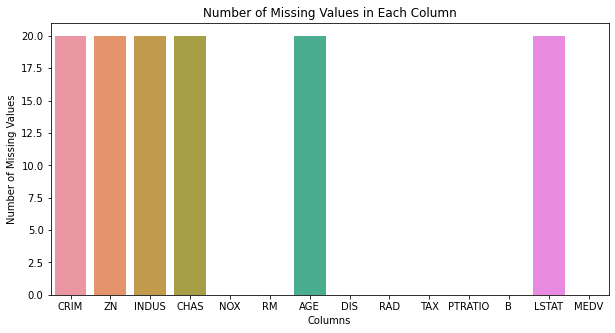

In [9]:
# Calculate the number of missing values in each column
missing = df.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

In [10]:
# recreate missing data
# Assuming your DataFrame is called df
# Create a copy to ensure the original dataframe remains unchanged
# df_filled = df.copy()

# List of categorical columns (add as necessary)
categorical_columns = []

for column in df.columns:
    # For categorical data, use mode imputation
    if column in categorical_columns:
        mode_val = df[column].mode()[0]
        df[column].fillna(mode_val, inplace=True)
    # For continuous data, use mean imputation
    else:
        mean_val = df[column].mean()
        df[column].fillna(mean_val, inplace=True)


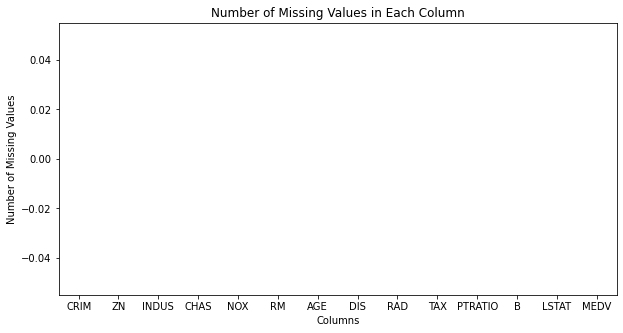

In [11]:
# Calculate the number of missing values in each column
missing = df.isnull().sum()

# Plot the number of missing values in each column
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

# Add labels and title to the plot
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values in Each Column")

# Show the plot
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### export the data set

In [13]:
# Assuming df is your DataFrame
df.to_csv('my_dataset.csv', index=False)

### delete the outliers - THE CODE IS CODE USE IT, 
FOR THIS PROJECT I DON'T DELETE THE OUTLIERS I WILL USE NORMALIZATION OR STADATIZATION - 

In [118]:
# # Assuming df_new is your dataframe
# plt.figure(figsize = (20,10))
# sns.boxplot(data = df)
# plt.xticks(rotation = 45)
# plt.show()


In [119]:
# def remove_outliers_automatic(df):
#     # Original data size
#     orig_size = df.shape[0]
    
#     # Method 1: Z-Score
#     z_scores = stats.zscore(df)
#     abs_z_scores = np.abs(z_scores)
#     filtered_entries_z = (abs_z_scores < 3).all(axis=1)
#     df_z = df[filtered_entries_z]
    
#     # Method 2: IQR
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
#     IQR = Q3 - Q1
#     filtered_entries_iqr = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
#     df_iqr = df[filtered_entries_iqr]
    
#     # Method 3: Modified Z-Score
#     median = df.median()
#     mad = (df - median).abs().median()
#     modified_z_scores = 0.6745 * (df - median) / mad
#     abs_modified_z_scores = np.abs(modified_z_scores)
#     filtered_entries_mz = (abs_modified_z_scores < 3.5).all(axis=1)
#     df_mz = df[filtered_entries_mz]
    
#     # Check which method retains the most data
#     sizes = [df_z.shape[0], df_iqr.shape[0], df_mz.shape[0]]
#     methods = ["Z-Score", "IQR", "Modified Z-Score"]
    
#     best_method_index = np.argmax(sizes)
#     best_method = methods[best_method_index]
    
#     print(f"Best method is: {best_method}")
    
#     if best_method == "Z-Score":
#         return df_z
#     elif best_method == "IQR":
#         return df_iqr
#     else:
#         return df_mz

# # Use the function
# df = remove_outliers_automatic(df)

In [121]:
# df_cleaned.info()

In [122]:
# # Assuming df_new is your dataframe
# plt.figure(figsize = (20,10))
# sns.boxplot(data = df)
# plt.xticks(rotation = 45)
# plt.show()

### create the pipeline for the regressions

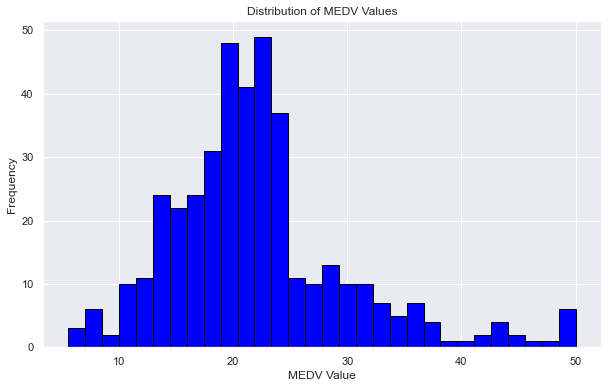

In [139]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df['MEDV'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of MEDV Values')
plt.xlabel('MEDV Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### create model on the all data

In [152]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating pipelines for each regression model
pipelines = {
    "linear": Pipeline([('scl', StandardScaler()), ('reg', LinearRegression())]),
    "tree": Pipeline([('scl', StandardScaler()), ('reg', DecisionTreeRegressor())]),
    "forest": Pipeline([('scl', StandardScaler()), ('reg', RandomForestRegressor())]),
    "svm": Pipeline([('scl', StandardScaler()), ('reg', SVR())]),
    "gboost": Pipeline([('scl', StandardScaler()), ('reg', GradientBoostingRegressor())])
}

# Train and evaluate models
for name, pipeline in pipelines.items():
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse}")
    print(f"{name} MAE: {mae}")
    print(f"{name} R^2: {r2}")
    print("----------------------")

linear MSE: 21.818457953526046
linear MAE: 3.141052567108469
linear R^2: 0.7071862632031756
----------------------
tree MSE: 19.029539473684213
tree MAE: 3.0269736842105264
tree R^2: 0.7446148314110508
----------------------
forest MSE: 9.3965508881579
forest MAE: 2.119322368421053
forest R^2: 0.8738939670061157
----------------------
svm MSE: 26.359581888192626
svm MAE: 2.960374569388088
svm R^2: 0.6462422922131299
----------------------
gboost MSE: 8.441235435555113
gboost MAE: 2.020641027733691
gboost R^2: 0.8867147395873953
----------------------


<AxesSubplot:>

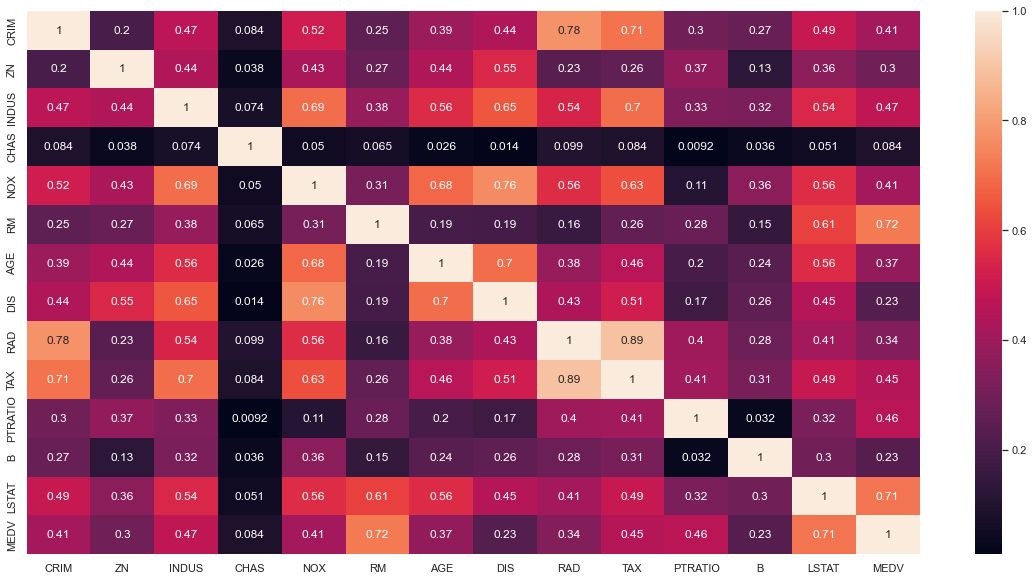

In [116]:
# correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

### create model on the column that have the corelation bigger and eqaul with 0.7

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

# Splitting data
X = df[["LSTAT", "RM"]]
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a list of regression models
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Support Vector Regression', SVR())
]

for name, regressor in regressors:
    # Creating and evaluating the pipeline
    pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('model', regressor)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(name)
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))
    print("------")


Linear Regression
Mean Squared Error: 29.911842396950465
Mean Absolute Error: 4.077817346984382
R^2 Score: 0.5985693230298483
------
Ridge
Mean Squared Error: 29.898694538335096
Mean Absolute Error: 4.077726844603762
R^2 Score: 0.5987457733372094
------
Lasso
Mean Squared Error: 30.06498126169371
Mean Absolute Error: 4.107599708831668
R^2 Score: 0.5965141290592293
------
ElasticNet
Mean Squared Error: 32.55179105629463
Mean Absolute Error: 4.238555014569506
R^2 Score: 0.5631399983020939
------
Support Vector Regression
Mean Squared Error: 21.87037493107959
Mean Absolute Error: 3.1832843580980428
R^2 Score: 0.7064895134955183
------


#### standardize and scale the date

#### on all data

In [127]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming your dataframe is named df and target variable is 'MEDV'
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)


In [128]:
# create model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Support Vector Regression": SVR()
}

# Evaluate models on Standardized data
print("===== Evaluating Models on Standardized Data =====")
for name, model in models.items():
    model.fit(X_train_standard, y_train)
    predictions = model.predict(X_test_standard)
    print(f"\n--- {name} ---")
    print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}")
    print(f"R2 Score: {r2_score(y_test, predictions)}")

# Evaluate models on Min-Max Scaled data
print("\n===== Evaluating Models on Min-Max Scaled Data =====")
for name, model in models.items():
    model.fit(X_train_minmax, y_train)
    predictions = model.predict(X_test_minmax)
    print(f"\n--- {name} ---")
    print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}")
    print(f"R2 Score: {r2_score(y_test, predictions)}")

===== Evaluating Models on Standardized Data =====

--- Linear Regression ---
Mean Squared Error: 20.999612562576086
Mean Absolute Error: 3.007313528853439
R2 Score: 0.687063826973533

--- Ridge ---
Mean Squared Error: 21.013713387349934
Mean Absolute Error: 3.0074612367968028
R2 Score: 0.6868536965185974

--- Lasso ---
Mean Squared Error: 26.137990174890263
Mean Absolute Error: 3.3228918488514236
R2 Score: 0.6104917368565895

--- ElasticNet ---
Mean Squared Error: 28.423796144970336
Mean Absolute Error: 3.4536192932421987
R2 Score: 0.576428662100978

--- Support Vector Regression ---
Mean Squared Error: 30.241772917415783
Mean Absolute Error: 3.2443621685731103
R2 Score: 0.5493371768592952

===== Evaluating Models on Min-Max Scaled Data =====

--- Linear Regression ---
Mean Squared Error: 20.999612562576083
Mean Absolute Error: 3.00731352885344
R2 Score: 0.687063826973533

--- Ridge ---
Mean Squared Error: 21.52770554984666
Mean Absolute Error: 3.0344416496196076
R2 Score: 0.679194186

#### only for correlation columns

In [125]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming your dataframe is named df and target variable is 'MEDV'
X = df[['LSTAT', 'RM']]  # Using only the two columns as discussed
y = df['MEDV']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)


In [126]:
# create model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Support Vector Regression": SVR()
}

# Evaluate models on Standardized data
print("===== Evaluating Models on Standardized Data =====")
for name, model in models.items():
    model.fit(X_train_standard, y_train)
    predictions = model.predict(X_test_standard)
    print(f"\n--- {name} ---")
    print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}")
    print(f"R2 Score: {r2_score(y_test, predictions)}")

# Evaluate models on Min-Max Scaled data
print("\n===== Evaluating Models on Min-Max Scaled Data =====")
for name, model in models.items():
    model.fit(X_train_minmax, y_train)
    predictions = model.predict(X_test_minmax)
    print(f"\n--- {name} ---")
    print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}")
    print(f"R2 Score: {r2_score(y_test, predictions)}")

===== Evaluating Models on Standardized Data =====

--- Linear Regression ---
Mean Squared Error: 26.05745175495956
Mean Absolute Error: 3.4311934704918596
R2 Score: 0.6116919201856681

--- Ridge ---
Mean Squared Error: 26.078797250804797
Mean Absolute Error: 3.4317907116095685
R2 Score: 0.6113738296608426

--- Lasso ---
Mean Squared Error: 28.80620628159873
Mean Absolute Error: 3.55415917043489
R2 Score: 0.5707299872170286

--- ElasticNet ---
Mean Squared Error: 32.060262502383644
Mean Absolute Error: 3.7403039456810045
R2 Score: 0.522238049686707

--- Support Vector Regression ---
Mean Squared Error: 26.822429531846293
Mean Absolute Error: 3.2375730844628237
R2 Score: 0.6002922232990764

===== Evaluating Models on Min-Max Scaled Data =====

--- Linear Regression ---
Mean Squared Error: 26.05745175495956
Mean Absolute Error: 3.4311934704918596
R2 Score: 0.6116919201856681

--- Ridge ---
Mean Squared Error: 26.701356272301755
Mean Absolute Error: 3.4538723057367426
R2 Score: 0.60209645

### create prediction - in future

linear MSE: 21.818457953526046
linear MAE: 3.141052567108469
linear R^2: 0.7071862632031756
----------------------


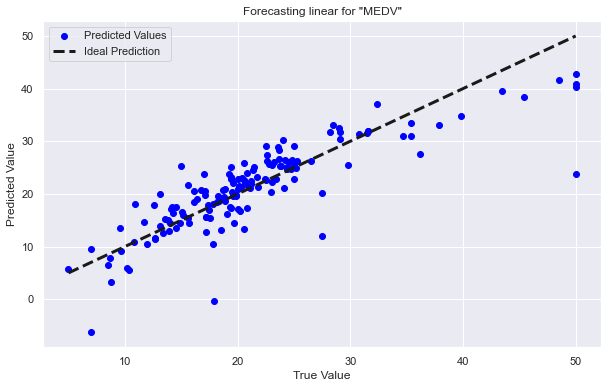

tree MSE: 20.28019736842105
tree MAE: 3.0953947368421053
tree R^2: 0.7278304274723131
----------------------


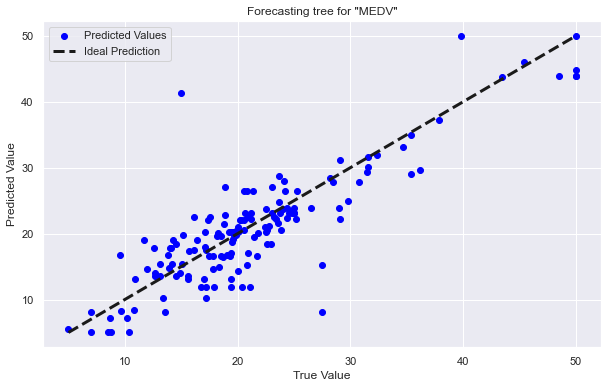

forest MSE: 10.048392322368425
forest MAE: 2.163006578947368
forest R^2: 0.8651459552741803
----------------------


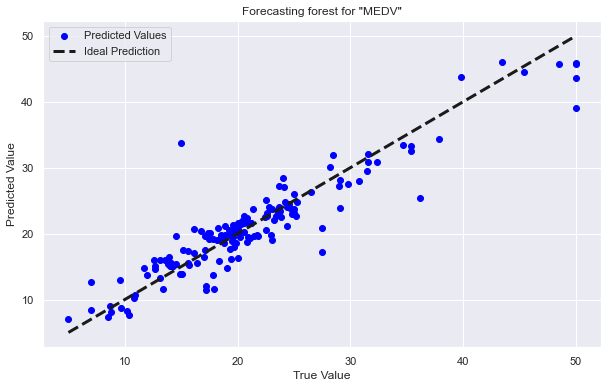

svm MSE: 26.359581888192626
svm MAE: 2.960374569388088
svm R^2: 0.6462422922131299
----------------------


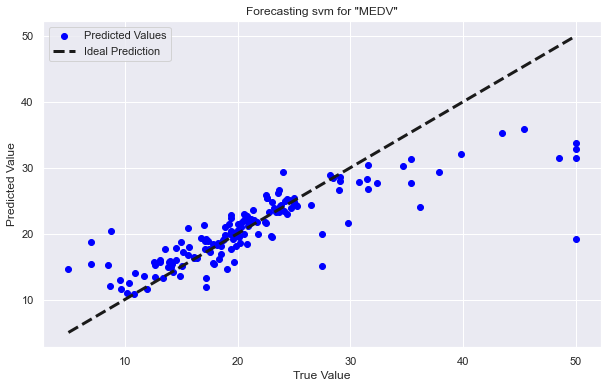

gboost MSE: 8.343012860708663
gboost MAE: 2.010094920855728
gboost R^2: 0.8880329316997736
----------------------


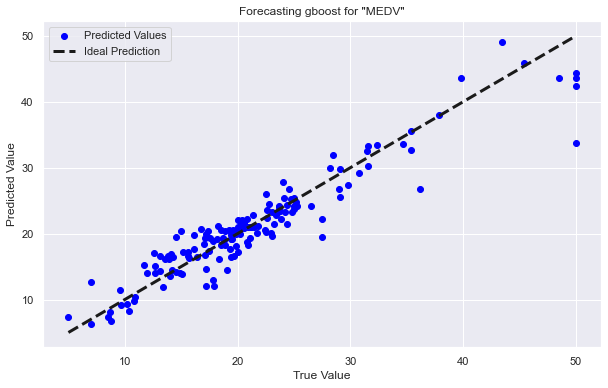

In [154]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating pipelines for each regression model
pipelines = {
    "linear": Pipeline([('scl', StandardScaler()), ('reg', LinearRegression())]),
    "tree": Pipeline([('scl', StandardScaler()), ('reg', DecisionTreeRegressor())]),
    "forest": Pipeline([('scl', StandardScaler()), ('reg', RandomForestRegressor())]),
    "svm": Pipeline([('scl', StandardScaler()), ('reg', SVR())]),
    "gboost": Pipeline([('scl', StandardScaler()), ('reg', GradientBoostingRegressor())])
}

# Train and evaluate models
for name, pipeline in pipelines.items():
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} MSE: {mse}")
    print(f"{name} MAE: {mae}")
    print(f"{name} R^2: {r2}")
    print("----------------------")
    
    # Plotting the forecasting
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, label='Ideal Prediction')
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.title(f'Forecasting {name} for "MEDV"')  # Added name of the predicted column
    plt.legend(loc='upper left')
    plt.show()


### model interpretation

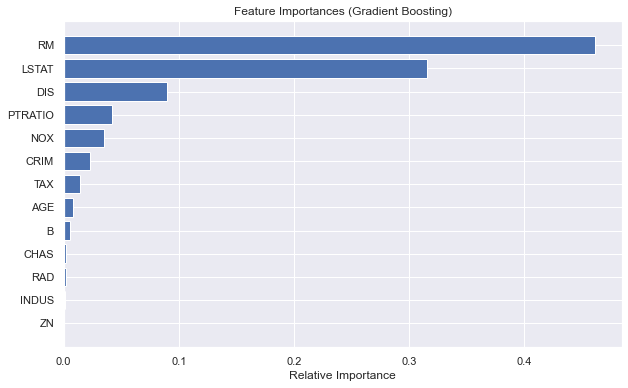

In [155]:
# Feature importance for Random Forest
# forest = pipelines['forest'].named_steps['reg']
# importances = forest.feature_importances_
# indices = np.argsort(importances)

# plt.figure(figsize=(10, 6))
# plt.title('Feature Importances (Random Forest)')
# plt.barh(range(len(indices)), importances[indices], align='center')
# plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

# Feature importance for Gradient Boosting
gboost = pipelines['gboost'].named_steps['reg']
importances = gboost.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Gradient Boosting)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
